**Please submit all parts of the Module 1 homework in 1 notebook.**

### Setting up your environment  
In this module, you will be using the pandas, matplotlib, and seaborn libraries, among others.  [Pandas](https://pandas.pydata.org/docs/) makes it easy to manipulate datasets, and 
[matplotlib](https://matplotlib.org/stable/tutorials/index) and [seaborn](https://seaborn.pydata.org/tutorial.html) provide powerful visualization tools.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

Now we authenticate a Google Drive client to mount your drive and access the data file.

**Make sure to follow the interactive instructions.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Colab Notebooks/Module 1/cmpe_188_diabetes.csv"    
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,solid_tumor_with_metastasis,diabetes_mellitus,bilirubin_max,albumin_min,urineoutput,apache_diagnosis,diasbp_noninvasive_max,sysbp_noninvasive_max,temperature_apache,bun_min
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,0,1,NaN,NaN,NaN,502.01,68.0,131.0,39.3,30.0
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,0,1,NaN,NaN,NaN,203.01,61.0,95.0,35.1,9.0
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,0,0,NaN,NaN,NaN,703.03,88.0,148.0,36.7,NaN
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,0,0,NaN,NaN,NaN,1206.03,NaN,NaN,34.8,NaN
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,0,0,NaN,NaN,NaN,601.01,99.0,130.0,36.7,NaN


# Module 1, Part 3

# Section 1: Data Visualization & Insights


## Visualization of continuous variables

The table below lists the variable that is assigned to each track.

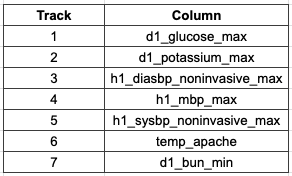


### 1\. Bin the variable assigned to your track into several bins and visualize it relative to the target variable, using a stacked bar chart (e.g., see figure below)

Feel free to experiment with different numbers of bins to see which binning may reveal some interesting insights. 

Hints: 
* [cut](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) and [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) can be useful tools for the binning
* [Histogram (Seaborn)](https://seaborn.pydata.org/generated/seaborn.histplot.html) can help with the visualization




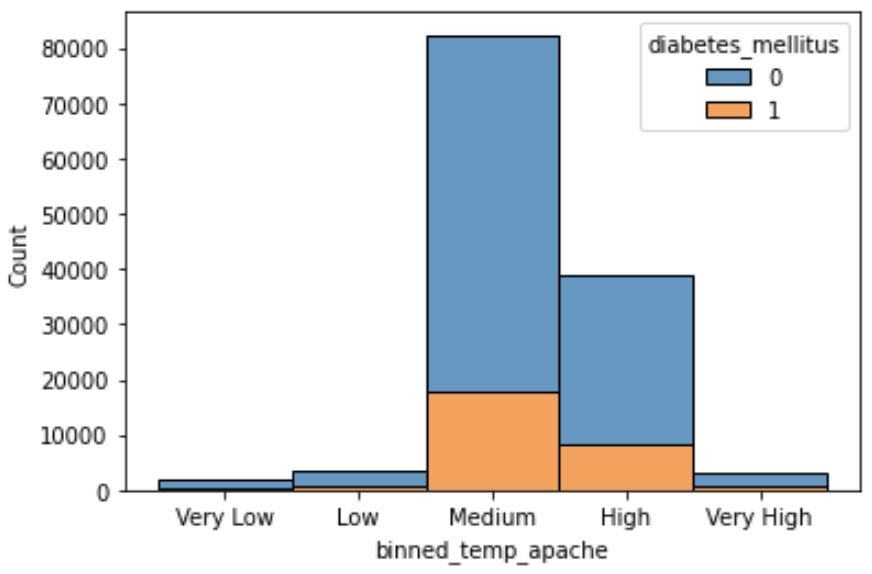

### 2\. Add your observations about the data based on the figure you have created.

## Visualization of discrete variables

### 3\. Visualize the distibution of Age values (e.g., using a histogram).  Example output is shown below. 



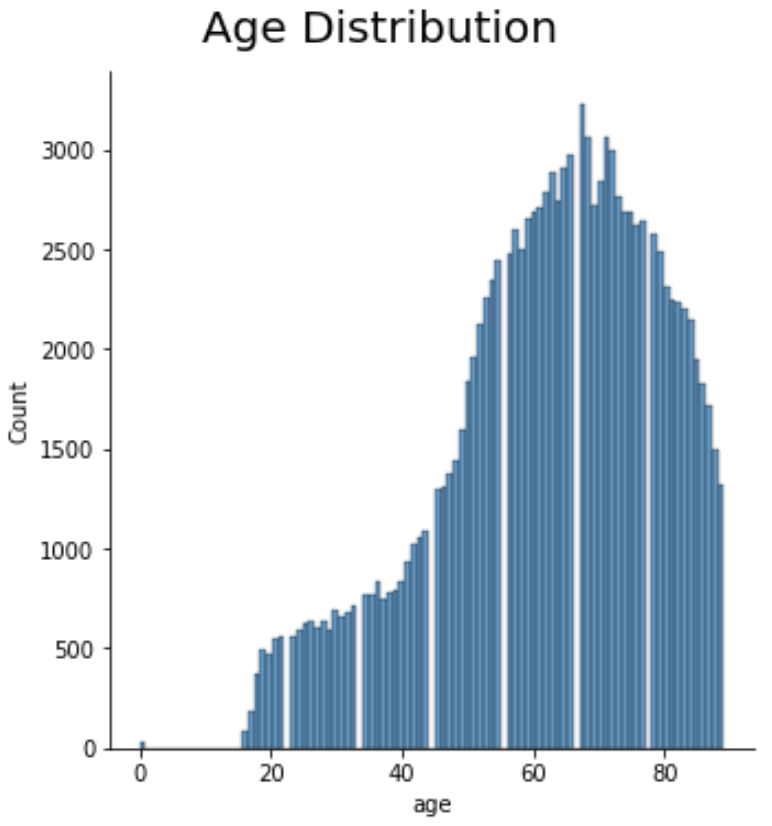


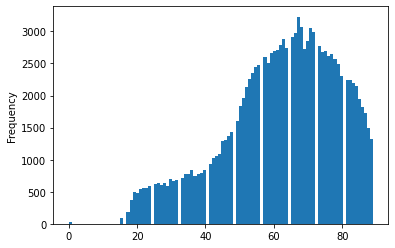

In [3]:
# add your code here
df.age.plot(kind='hist', bins= 100)


### 4\. Add your observations about the data based on the figure you have created.




The histogram is skewed left

### 5\. Aggregate the 'Age' column based on the number of records per age value.  The second image below shows the final output you should be getting.

Hints: 
* Use [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) method to aggregate the age column 
* The plot would have aggregated age values along the X-axis and the count along the Y-axis
* Visualize the distribution of the age before and after aggregation to witness the effect of the aggregation

Intermediate output based on second bullet above:



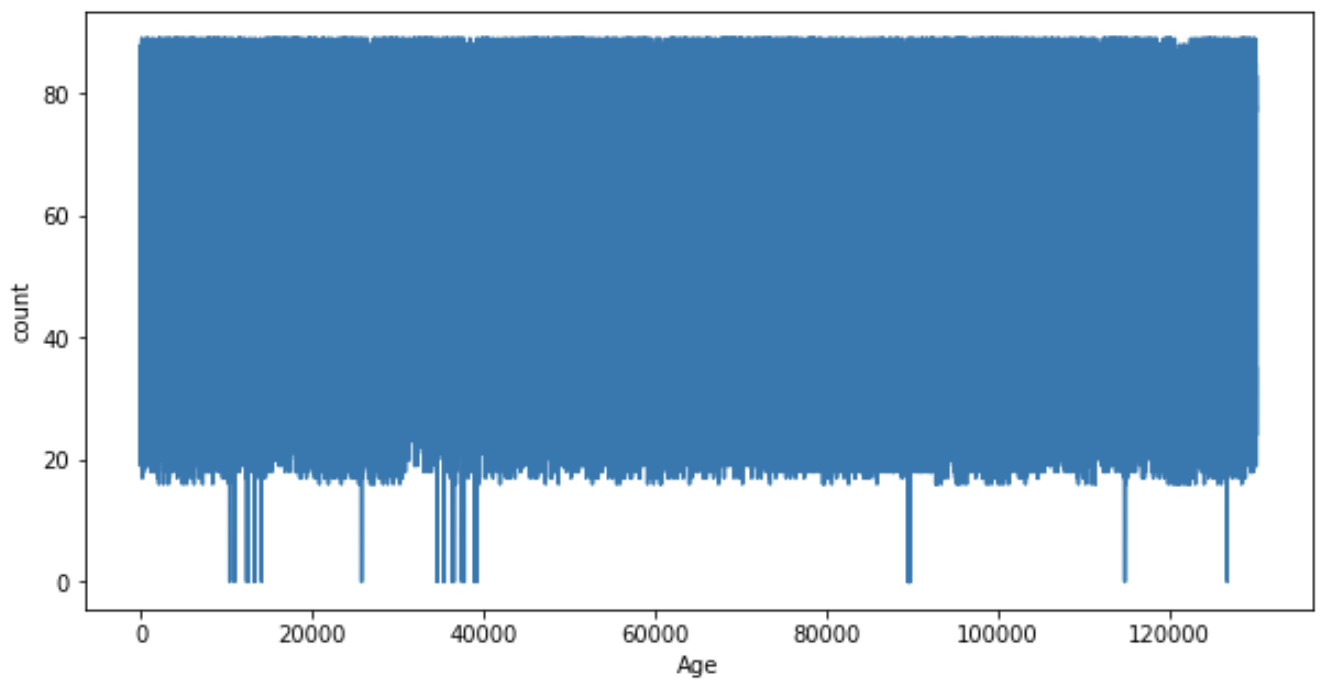


Final output:

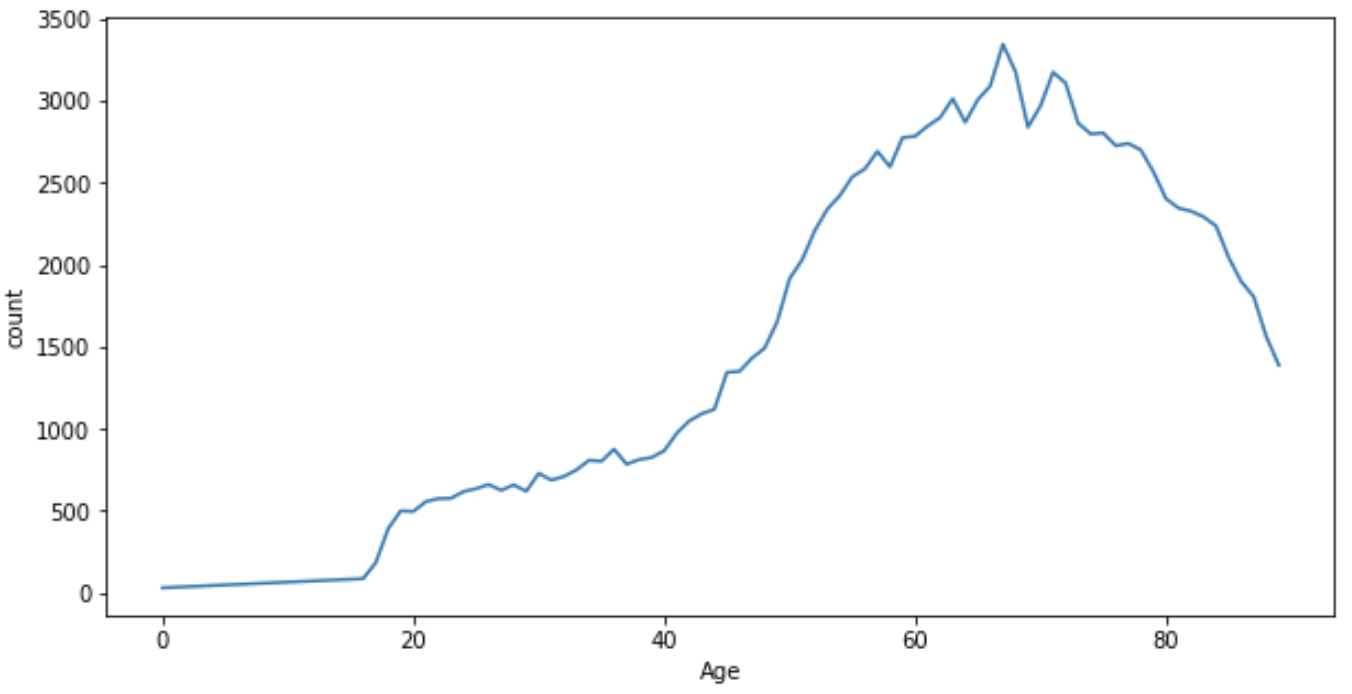

<function matplotlib.pyplot.show>

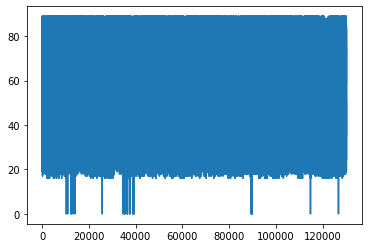

In [4]:
plt.plot(df.age)
plt.show

Text(0, 0.5, 'count')

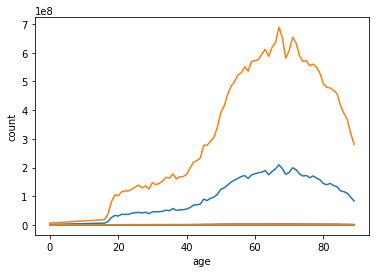

In [5]:
df.groupby('age').agg(['sum']).plot.line(legend = '')
plt.xlabel('age')
plt.ylabel('count')

### 6\. Add your observations about the data based on the figure you have created.


There are many 60-80 year olds represented in the data



### 7\. Plot the number of records for each gender.  The final plot would look as the one shown below. 



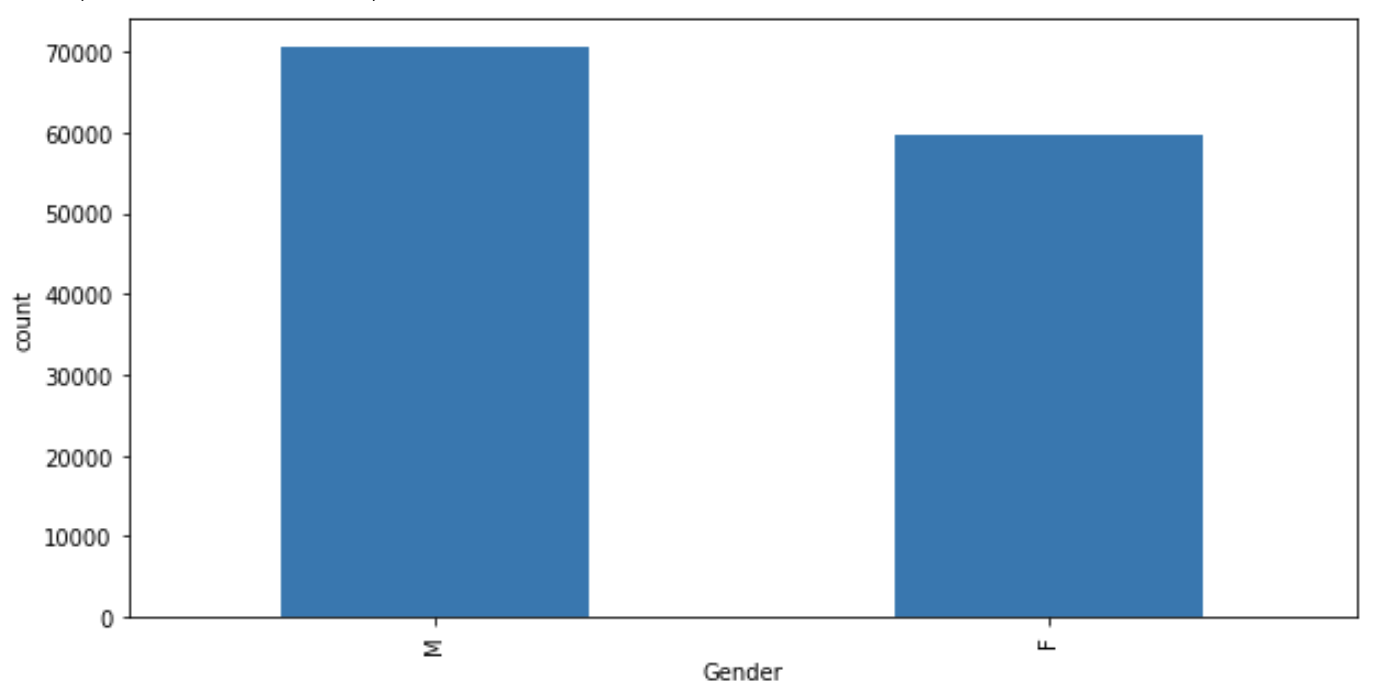

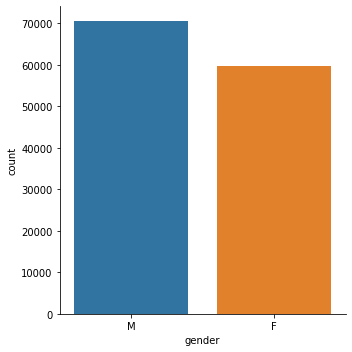

In [7]:
# add your code here
#https://seaborn.pydata.org/tutorial/categorical.html
sns.catplot(x="gender", kind="count", data=df)


### 8\. Add your observations about the data based on the figure you have created.


There are more males than females in the dataset

### 9\. Visualize the distribution of data records in terms of ethnicity, using a pie chart.  The output should look like the figure shown below.



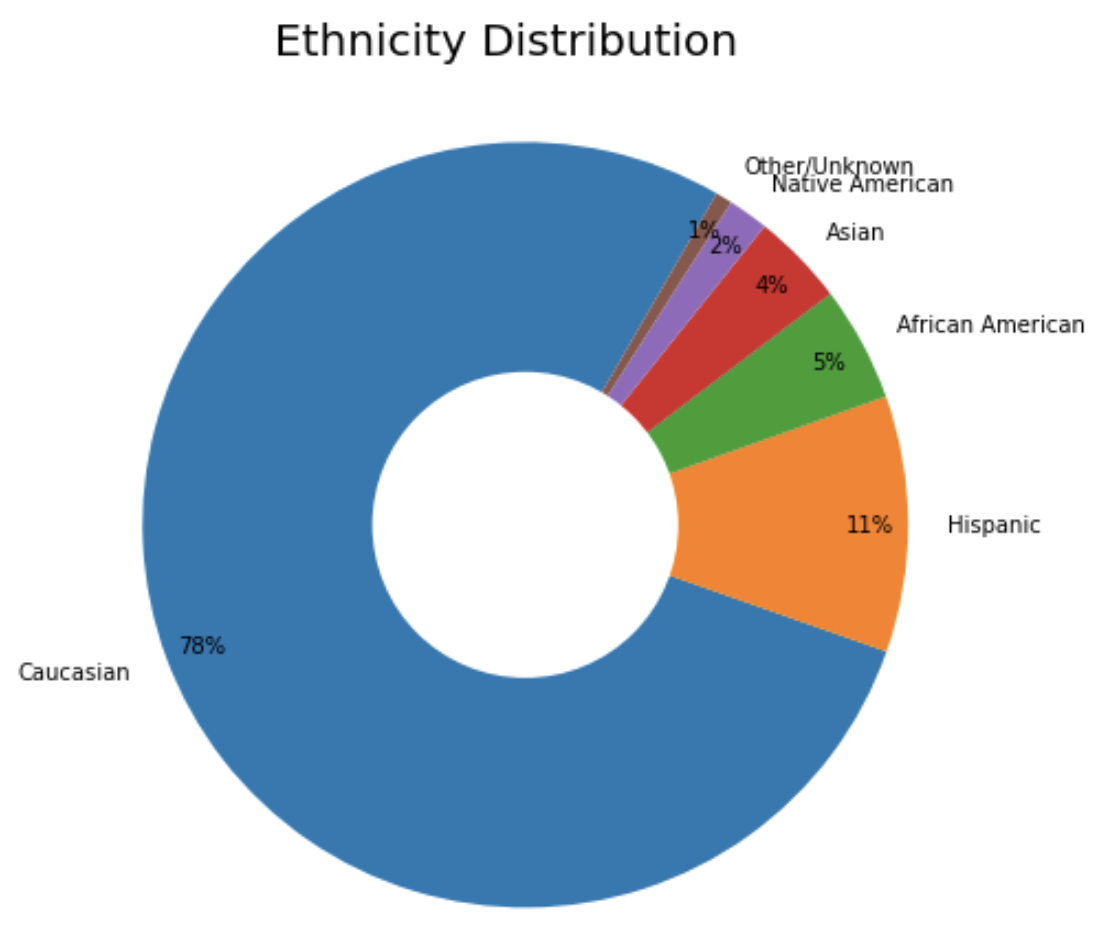

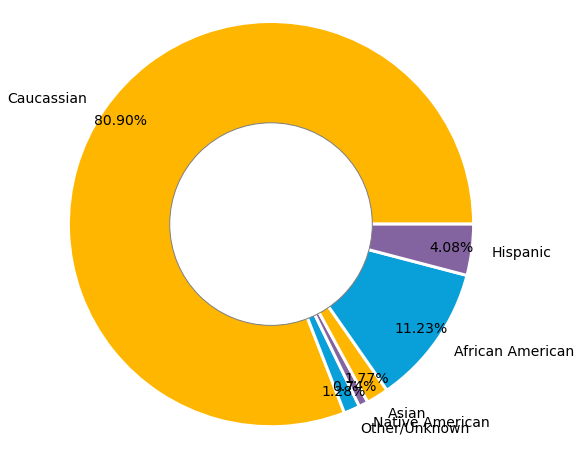

In [8]:
# add code here
#https://python.plainenglish.io/how-to-make-a-beautiful-donut-chart-and-nested-donut-chart-in-matplotlib-92040c8bbeea
Cau = df.ethnicity.value_counts()['Caucasian']
Null = df['ethnicity'].isna().sum() 
Native = df.ethnicity.value_counts()['Native American']
Asian = df.ethnicity.value_counts()['Asian']
African = df.ethnicity.value_counts()['African American']
His = df.ethnicity.value_counts()['Hispanic']

pie_df=pd.DataFrame({'x':['Caucassian', 'Other/Unknown', 'Native American', 'Asian', 'African American', 'Hispanic'],
 'y':[Cau, Null, Native, Asian, African, His]})

plt.figure(figsize=(8, 8)) # change the size of a figure
# The slices will be ordered and plotted counter-clockwise.
labels = pie_df['x']
sizes = pie_df['y']
colors = ['#FFB600', '#09A0DA','#8464a0'] #define colors of three donut pieces
explode = (0, 0, 0, 0, 0, 0) # explode a slice if required
textprops = {"fontsize":14,'color':'black'} # Font size of text in donut chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
 autopct='%.2f%%', # Show data in 0.00%
 pctdistance =0.9,
 shadow=False,
 textprops =textprops,
 wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
 
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.5,color='grey', fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal') # Set aspect ratio to be equal so that pie is      drawn as a circle.
plt.show()

### 10\. Add your observations about the data based on the figure you have created.

Caucasians represent the bulk of the data

### 11\. Plot a histogram of the BMI attribute (sample output shown below)



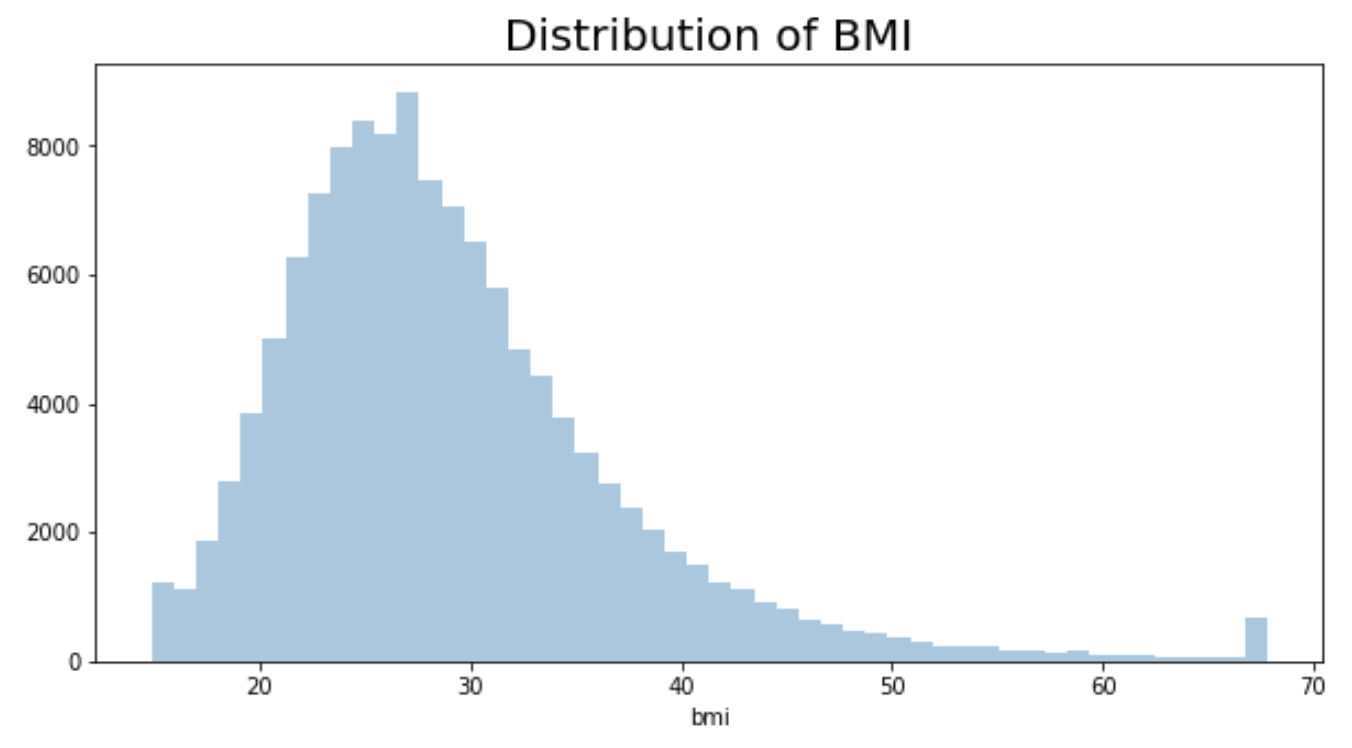

Text(0.5, 0, 'bmi')

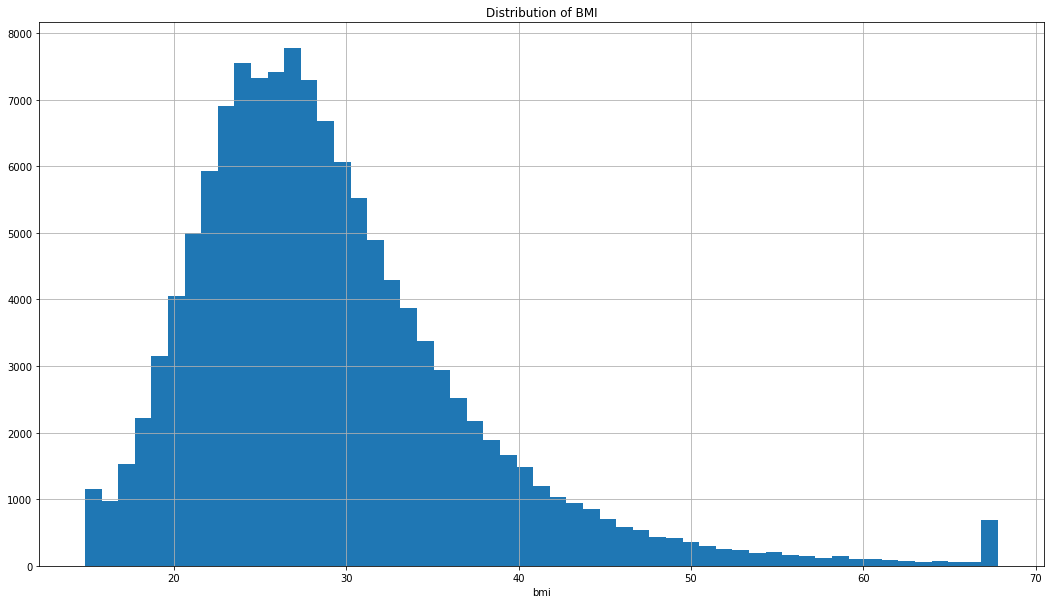

In [9]:
# add your code here
df['bmi'].hist(figsize=(18,10), bins = 55)
plt.title('Distribution of BMI')
plt.xlabel('bmi')


### 12\. Add your observations about the data based on the figure you have created.

Skewed right and the highest bmi is in the range 20-30

### 13\. Plot a histogram of the target variable (sample output shown below) 



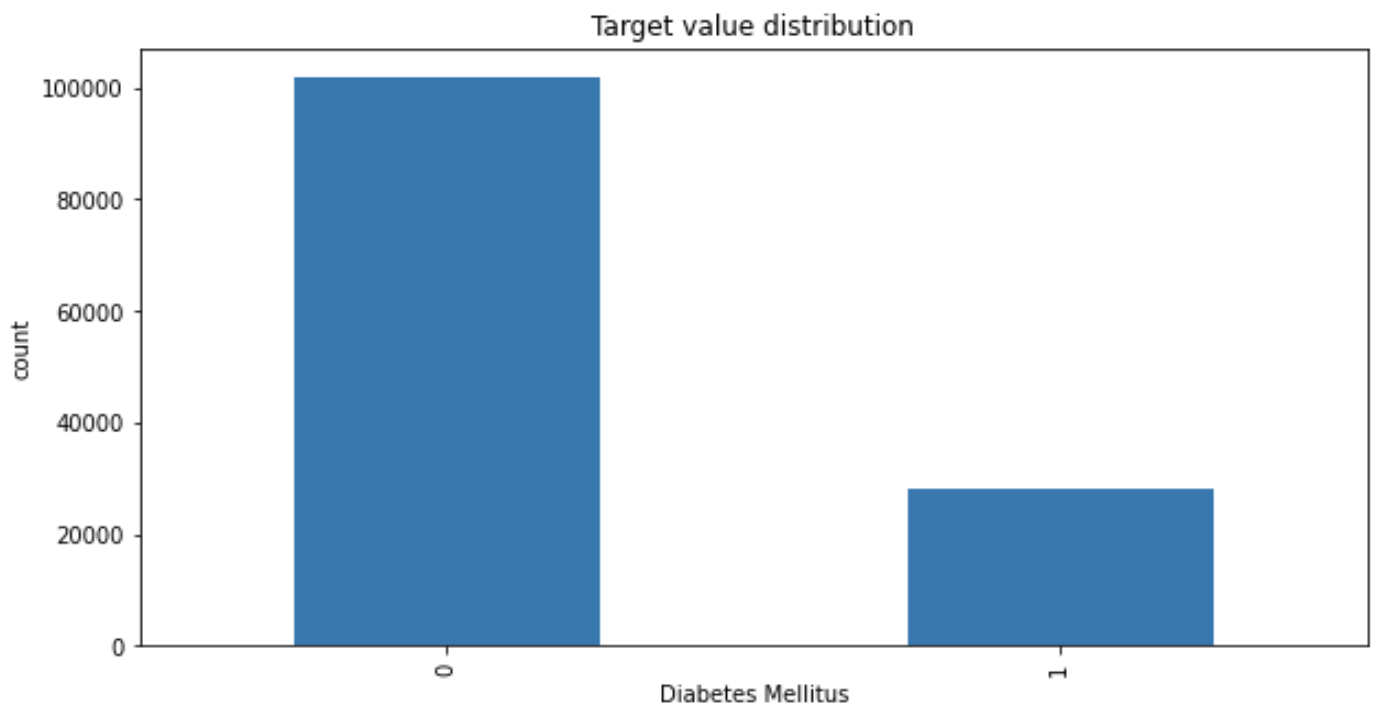

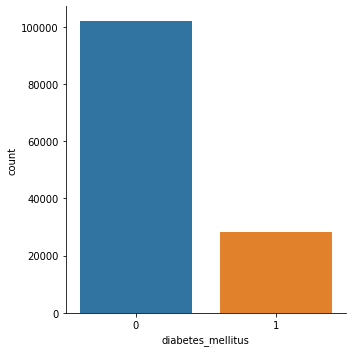

In [10]:
# add your code here
sns.catplot(x="diabetes_mellitus", kind="count", data=df)


### 14\. Add your observations about the data based on the figure you have created.

Less people are classified with diabetes


# Section 2: Similarity and Distance Measures

In this part of the assignment, you will be creating a very simple wine recommender system using the [cosine similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) and [euclidean distance](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html) metrics.



## Pre-processing steps

### 1\. Import the data and set the title column to be the index of the data frame

In [ ]:
wine_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module 1/wine_data.csv", index_col=0)
print(wine_data.shape)
wine_data.head()

(1781, 5)


,wine_country,average_rating,num_of_ratings,wine_price,grapes
title,,,,,
El Enemigo Chardonnay 2018,Argentina,4.3,2239,23.99,Chardonnay
Minuty M Rosé 2020,France,4.0,354,18.99,Rosé wine Blend
Santi Infinito Rosé 2018,Italy,3.8,93,12.29,Rosé wine Blend
Jansz Premium Rosé N.V.,Australia,3.9,1460,29.00,Sparkling wine Blend
Balbach Riesling 2018,Germany,4.3,49,14.99,Riesling


### 2\. Find the categorical features and encode them using the [dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) method in Pandas instead of LabelEncoder.



In [ ]:
wine_data = pd.get_dummies(wine_data, drop_first=True)
wine_data


,average_rating,num_of_ratings,wine_price,wine_country_Australia,wine_country_Austria,wine_country_Brazil,wine_country_Chile,wine_country_Croatia,wine_country_France,wine_country_Georgia,...,grapes_Vidal,grapes_Viognier,grapes_Viura,grapes_Vranac,grapes_Welschriesling,grapes_White wine Blend,grapes_Xinomavro,grapes_Zibibbo,grapes_Zinfandel,grapes_Zweigelt
title,,,,,,,,,,,,,,,,,,,,,
El Enemigo Chardonnay 2018,4.3,2239,23.990000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Minuty M Rosé 2020,4.0,354,18.990000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Santi Infinito Rosé 2018,3.8,93,12.290000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jansz Premium Rosé N.V.,3.9,1460,29.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Balbach Riesling 2018,4.3,49,14.990000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dutton-Goldfield Dutton Ranch Pinot Noir 2017,4.3,411,39.990000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tzora Vineyards Judean Hills Blanc 2018,4.2,38,36.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Claus Preisinger Kalkundkiesel 2019,4.1,369,39.990000,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### 3\. Standardize the data using [standard scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_data)
df_normalized = pd.DataFrame(wine_scaled)
new_normalized = pd.DataFrame(data=df_normalized.values, columns=wine_data.columns, index=wine_data.index)
new_normalized

,average_rating,num_of_ratings,wine_price,wine_country_Australia,wine_country_Austria,wine_country_Brazil,wine_country_Chile,wine_country_Croatia,wine_country_France,wine_country_Georgia,...,grapes_Vidal,grapes_Viognier,grapes_Viura,grapes_Vranac,grapes_Welschriesling,grapes_White wine Blend,grapes_Xinomavro,grapes_Zibibbo,grapes_Zinfandel,grapes_Zweigelt
title,,,,,,,,,,,,,,,,,,,,,
El Enemigo Chardonnay 2018,1.115390,0.702114,-2.914786e-01,-0.095211,-0.101044,-0.033529,-0.089011,-0.023702,-0.537319,-0.047445,...,-0.023702,-0.023702,-0.033529,-0.023702,-0.033529,-0.126383,-0.033529,-0.033529,-0.101044,-0.05814
Minuty M Rosé 2020,-0.169822,-0.231704,-6.931108e-01,-0.095211,-0.101044,-0.033529,-0.089011,-0.023702,1.861091,-0.047445,...,-0.023702,-0.023702,-0.033529,-0.023702,-0.033529,-0.126383,-0.033529,-0.033529,-0.101044,-0.05814
Santi Infinito Rosé 2018,-1.026630,-0.361002,-1.231298e+00,-0.095211,-0.101044,-0.033529,-0.089011,-0.023702,-0.537319,-0.047445,...,-0.023702,-0.023702,-0.033529,-0.023702,-0.033529,-0.126383,-0.033529,-0.033529,-0.101044,-0.05814
Jansz Premium Rosé N.V.,-0.598226,0.316202,1.109569e-01,10.502976,-0.101044,-0.033529,-0.089011,-0.023702,-0.537319,-0.047445,...,-0.023702,-0.023702,-0.033529,-0.023702,-0.033529,-0.126383,-0.033529,-0.033529,-0.101044,-0.05814
Balbach Riesling 2018,1.115390,-0.382799,-1.014417e+00,-0.095211,-0.101044,-0.033529,-0.089011,-0.023702,-0.537319,-0.047445,...,-0.023702,-0.023702,-0.033529,-0.023702,-0.033529,-0.126383,-0.033529,-0.033529,-0.101044,-0.05814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dutton-Goldfield Dutton Ranch Pinot Noir 2017,1.115390,-0.203467,9.937445e-01,-0.095211,-0.101044,-0.033529,-0.089011,-0.023702,-0.537319,-0.047445,...,-0.023702,-0.023702,-0.033529,-0.023702,-0.033529,-0.126383,-0.033529,-0.033529,-0.101044,-0.05814
Tzora Vineyards Judean Hills Blanc 2018,0.686986,-0.388249,6.732420e-01,-0.095211,-0.101044,-0.033529,-0.089011,-0.023702,-0.537319,-0.047445,...,-0.023702,-0.023702,-0.033529,-0.023702,-0.033529,-0.126383,-0.033529,-0.033529,-0.101044,-0.05814
Claus Preisinger Kalkundkiesel 2019,0.258582,-0.224273,9.937445e-01,-0.095211,9.896689,-0.033529,-0.089011,-0.023702,-0.537319,-0.047445,...,-0.023702,-0.023702,-0.033529,-0.023702,-0.033529,7.912468,-0.033529,-0.033529,-0.101044,-0.05814


## Wine Recommendations
In the following 2 exercises, you will be computing the top 10 wines that are "similar" to the wine assigned to your track, using cosine similarity and euclidean distance.



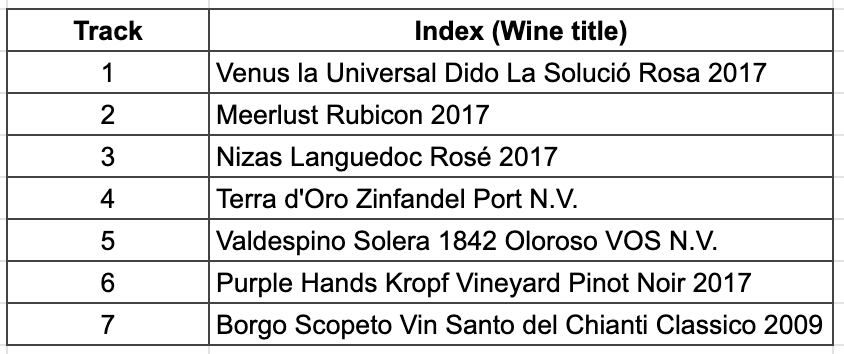

### 4\. Find the top 10 wines that are similar to the wine assigned to your track (based on cosine similarity) and show the wines along with the cosine similarity score for each wine and the wine assigned to your track.  

**Note: Your output should look like the table shown below:**


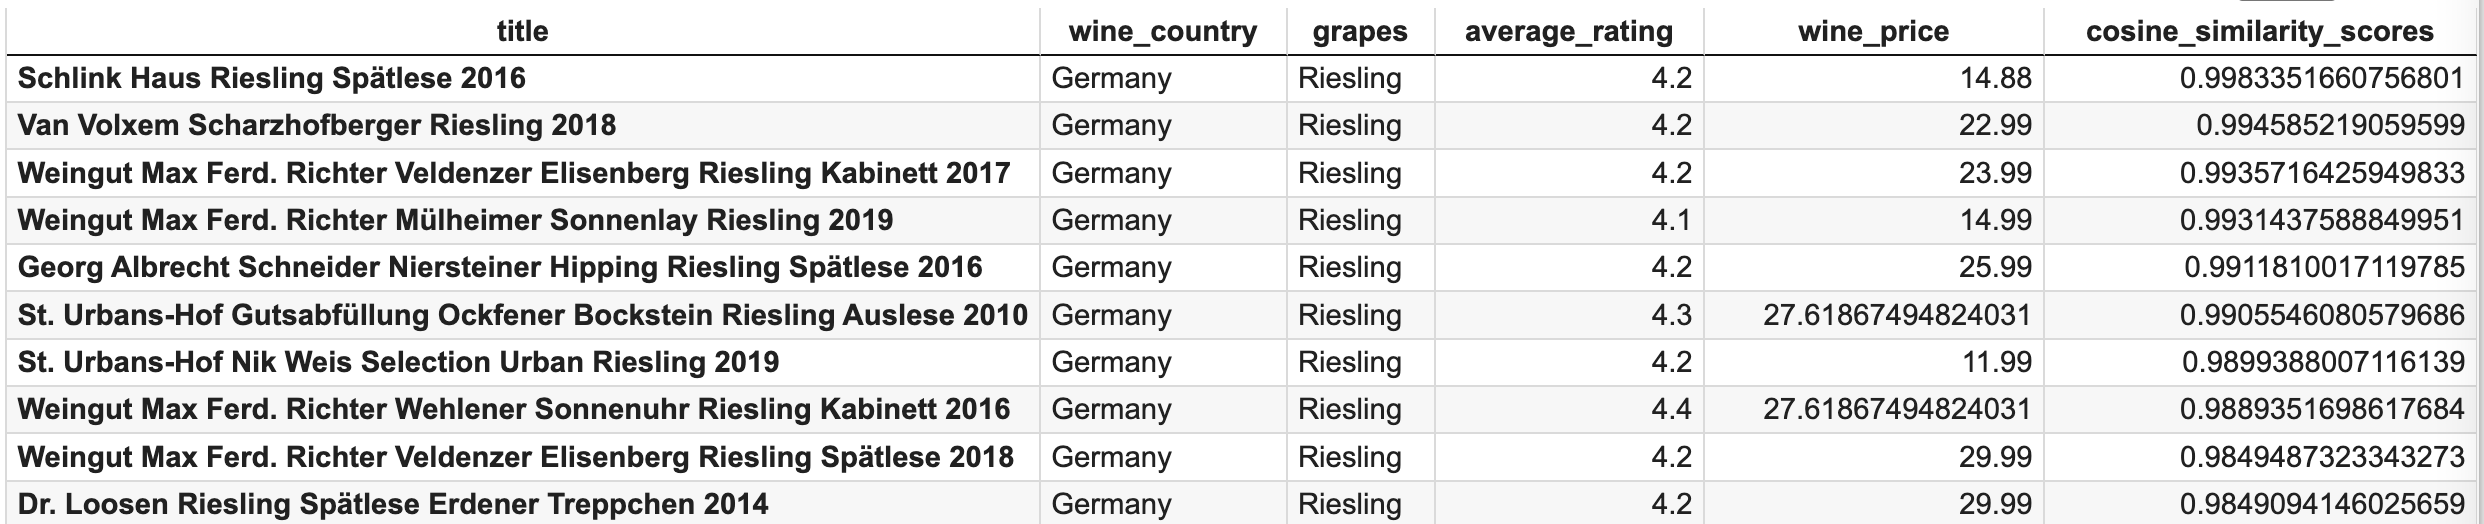

In [ ]:
#title = 'Purple Hands Kropf Vineyard Pinot Noir 2017'
#source = https://www.youtube.com/watch?v=0K_xbQ5Bvgo&ab_channel=StudyGyaan
wine_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module 1/wine_data.csv", index_col=0)
select_features_df = wine_data[['wine_country', 'grapes']]

In [ ]:
#for index, row in select_features_df.iterrows():
#  row['grapes'] = ''.join(row['grapes']).lower()

select_features_df['grapes'] = select_features_df['grapes'].str.replace(" ","")
select_features_df['wine_country'] = select_features_df['wine_country'].str.replace(" ","")

select_features_df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,wine_country,grapes
title,,
El Enemigo Chardonnay 2018,Argentina,Chardonnay
Minuty M Rosé 2020,France,RoséwineBlend
Santi Infinito Rosé 2018,Italy,RoséwineBlend
Jansz Premium Rosé N.V.,Australia,SparklingwineBlend
Balbach Riesling 2018,Germany,Riesling
...,...,...
Dutton-Goldfield Dutton Ranch Pinot Noir 2017,UnitedStates,PinotNoir
Tzora Vineyards Judean Hills Blanc 2018,Israel,Chardonnay
Claus Preisinger Kalkundkiesel 2019,Austria,WhitewineBlend


In [ ]:
def important_features(dataset):
    data=dataset.copy()
    for i in range(0, dataset.shape[0]):
        data["imp"]=data["wine_country"]+' '+data["grapes"]
    return data

data=important_features(select_features_df)
data.head()

,wine_country,grapes,imp
title,,,
El Enemigo Chardonnay 2018,Argentina,Chardonnay,Argentina Chardonnay
Minuty M Rosé 2020,France,RoséwineBlend,France RoséwineBlend
Santi Infinito Rosé 2018,Italy,RoséwineBlend,Italy RoséwineBlend
Jansz Premium Rosé N.V.,Australia,SparklingwineBlend,Australia SparklingwineBlend
Balbach Riesling 2018,Germany,Riesling,Germany Riesling


In [ ]:
#title = 'Purple Hands Kropf Vineyard Pinot Noir 2017'
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
count = CountVectorizer()
count_matrix = count.fit_transform(data['imp'])

In [ ]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim


array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.75      , ..., 0.5       , 0.4472136 ,
        0.35355339],
       [0.        , 0.75      , 1.        , ..., 0.5       , 0.4472136 ,
        0.        ],
       ...,
       [0.        , 0.5       , 0.5       , ..., 1.        , 0.4472136 ,
        0.        ],
       [0.        , 0.4472136 , 0.4472136 , ..., 0.4472136 , 1.        ,
        0.        ],
       [0.        , 0.35355339, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
from numpy.core.numeric import indices
def recommend (title, cosign = cosine_sim):
  recommendation = []

  idx = indices[indices == title].index[0]


  score_series = pd.Series(cosine_sim[idx].sort_values(ascending = False))


  top_10_indexes = list(score_series.iloc[1:11].index)


  for i in top_10_indexes:
    recommendation.append(list(wine_data.index)[i])

  return recommendation

In [ ]:
#recommend('Purple Hands Kropf Vineyard Pinot Noir 2017')

### 5\. Same as 4 above but using Euclidean distance 

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
